In [1]:
import numpy as np
import scipy.io 
from graphviz import Digraph
import matplotlib.pyplot as plt

#### Deviation Scores 2

In [2]:
params1 = scipy.io.loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_21_03_2024/Database/21stMarch2024params.mat')['params']
scores1 = scipy.io.loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_21_03_2024/Database/21stMarch2024_deviationScores2.mat')['deviationScores2']

params2 = scipy.io.loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_27_03_2022/Database_and_Matlab/27thMarch2022params.mat')['params']
scores2 = scipy.io.loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_27_03_2022/Database_and_Matlab/27thMarch2022DeviationScores2.mat')['deviationScores2']

params3 = scipy.io.loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_15_04_2022/Database/15thApril2022params.mat')['params']
scores3 = scipy.io.loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_15_04_2022/Database/15thApril2022DeviationScores2.mat')['deviationScores2']

params4 = scipy.io.loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_12_04_2024/Database/12thApril2024params.mat')['params']
scores4 = scipy.io.loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_12_04_2024/Database/12thApril2024DeviationScores2.mat')['deviationScores2']

# Concatenate datasets
X = np.concatenate((params1, params2, params3, params4), axis=0)
Y = np.concatenate((scores1, scores2, scores3, scores4), axis=0).flatten()  # Flatten Y to make it a 1D array

#### Deviation Scores 1

In [ ]:
params1 = scipy.io.loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_21_03_2024/Database/21stMarch2024params.mat')['params']
scores1 = scipy.io.loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_21_03_2024/Database/21stMarch2024DeviationScores1.mat')['deviationScores1']

params2 = scipy.io.loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_27_03_2022/Database_and_Matlab/27thMarch2022params.mat')['params']
scores2 = scipy.io.loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_27_03_2022/Database_and_Matlab/27thMarch2022DeviationScores1.mat')['deviationScores1']

params3 = scipy.io.loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_15_04_2022/Database/15thApril2022params.mat')['params']
scores3 = scipy.io.loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_15_04_2022/Database/15thApril2022DeviationScores1.mat')['deviationScores1']

params4 = scipy.io.loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_12_04_2024/Database/12thApril2024params.mat')['params']
scores4 = scipy.io.loadmat('/Users/dada/Desktop/TFM/EARLINET_Database/FINAL_CASES/BCN_12_04_2024/Database/12thApril2024DeviationScores1.mat')['deviationScores1']

# Concatenate datasets
X = np.concatenate((params1, params2, params3, params4), axis=0)
Y = np.concatenate((scores1, scores2, scores3, scores4), axis=0).flatten()  # Flatten Y to make it a 1D array

In [4]:
def find_importance(s1,s2,Y):
    MSE_s1 = mse_calculation(s1,Y)
    MSE_s2 = mse_calculation(s2,Y)
    MSE_node = mse_calculation(s1+s2,Y)
    node_importance = ((len(s1)+len(s2))/len(Y))*MSE_node - (len(s1)/len(Y))*MSE_s1 - (len(s2)/len(Y))*MSE_s2
    return node_importance
    

def find_mean_value(subset, Y):
    target_values = [Y[i] for i in subset]
    if target_values:
        mean_value = sum(target_values)/len(target_values)
    else:
        mean_value = 0
    return mean_value 

def mse_calculation(subset, Y):
    mean_y = find_mean_value(subset,Y)
    mse = sum((Y[i] - mean_y) ** 2 for i in subset) / len(subset) if subset else 0
    return mse

def IG(s1, s2, Y):
    MSE_before = mse_calculation(s1+s2,Y)
    MSE_s1 = mse_calculation(s1,Y)
    MSE_s2 = mse_calculation(s2,Y)
    tot_samples = len(s1)+len(s2)
    MSE_after = (len(s1)/tot_samples)*MSE_s1 + (len(s2)/tot_samples)*MSE_s2
    Delta = MSE_before - MSE_after
    return Delta

def DecisionTree(X, Y):
    D = {}
    D_importances = {}
    n, m = X.shape
    samples = list(range(n))
    var_set = list(range(m))

    def split(var_set, samples, actual_depth):
        Information_Gain = 0
        var = None
        sub_set1, sub_set2 = [], []

        for v in var_set: # Iterate over all variables and try to split 
            sub1 = [i for i in samples if X[i, v] == 0] # subset which does not contain the feature
            sub2 = [i for i in samples if X[i, v] != 0] # subset which contains the feature 

            current_gain = IG(sub1, sub2, Y) # calculate IG for the current split 
            # If the current split is better than the previous best split, update the best split 
            if current_gain > Information_Gain:
                Information_Gain = current_gain
                var = v
                sub_set1, sub_set2 = sub1, sub2
                node_importance = find_importance(sub1,sub2,Y)
    
        if var is not None: 
            node_importance = node_importance.item() if isinstance(node_importance, np.ndarray) and node_importance.size == 1 else node_importance # Convert node_importance to a scalar value
            Information_Gain = Information_Gain.item() if isinstance(Information_Gain, np.ndarray) and Information_Gain.size == 1 else Information_Gain # Convert IG to a scalar value
            D[tuple(samples)] = [var, sub_set1, sub_set2, Information_Gain, actual_depth] # Save the best split in the dictionary 
            print(f'Splitting on variable {var} with IG = {Information_Gain} for samples {tuple(samples)} and depth {actual_depth}')

            if var in D_importances:
                D_importances[var] += node_importance/actual_depth # Update the importance of the feature if it already exists in the dictionary
            else:
                D_importances[var] = node_importance/actual_depth # Add the feature and its importance to the dictionary if it does not exist

            # print(f'Splitting on variable {var} with IG = {Information_Gain} for samples {tuple(samples)}')
            # print(f'Left subset: {sub_set1}, Right subset: {sub_set2}')

            if len(sub_set2) > 1:
                split(var_set, sub_set2, actual_depth+1) # Recursively split the right child if contains more than one sample
            new_var_set = var_set[:]  # Create a copy of var_set before modifying it
            new_var_set.remove(var) # Remove the variable used for the current split 
            
            if len(sub_set1) > 1:
                # print(f'Dada is subset {sub_set1} with variable set {new_var_set}')
                split(new_var_set, sub_set1, actual_depth+1) # Recursively split the left child if contains more than one sample 

    split(var_set, samples, 1) # Start the recursive splitting process and ensure the tree is built 

    total_importance = sum(D_importances.values())
    print(f'Total importance: {total_importance}')
    for feature in D_importances:
        print(f'Feature {feature} importance: {D_importances[feature]}')
        D_importances[feature] /= total_importance # Normalize the importance of each feature
    return D, D_importances

def print_leaf(samples, case_labels, space, depth, direction=''):
    if samples:  
        sample_cases = ", ".join(case_labels[idx] for idx in samples) 
        print(f"{space}{direction} Leaf node at depth {depth} containing cases: {sample_cases}")
    else:
        print(f"{space}{direction} Leaf node at depth {depth} with no cases.")

def print_tree(samples, D, case_labels, variable_names, depth=0):
    samples_tuple = tuple(samples)
    
    if samples_tuple in D:
        var, sub_set1, sub_set2, information_gain, depth = D[samples_tuple]
        if isinstance(information_gain, np.ndarray):
            if information_gain.size == 1:
                information_gain = information_gain.item()  
        var_name = variable_names.get(var, f"Unknown variable {var}")  # Get the variable name or use a default name
        
        space = "    " * depth  # Initial space for readability
        print(f"{space}Split on {var_name} at depth {depth} with IG {information_gain:.4f}")
        
        # Process left child
        if sub_set1 and len(sub_set1) > 1:
            print(f"{space}Left:")
            print(f"{space}    Cases: " + ", ".join(case_labels[i] for i in sub_set1))
            print_tree(sub_set1, D, case_labels, variable_names)
        else:
            print_leaf(sub_set1, case_labels, space, depth, 'Left') 
        
        # Process right child
        if sub_set2 and len(sub_set2) > 1:
            print(f"{space}Right:")
            print(f"{space}    Cases: " + ", ".join(case_labels[i] for i in sub_set2))
            print_tree(sub_set2, D, case_labels, variable_names)
        else:
            print_leaf(sub_set2, case_labels, space, depth, 'Right')
    else:
        depth = 0
        print_leaf(samples, case_labels, "    " * depth, depth)

def create_dot(D, case_labels, variable_names):
    dot = Digraph(comment='Decision Tree', format='png')

    def add_nodes_and_edges(samples, parent=None, edge_label=''):
        samples_tuple = tuple(samples)
        
        if samples_tuple in D:
            var, sub_set1, sub_set2, information_gain, depth = D[samples_tuple]
            if isinstance(information_gain, np.ndarray):
                if information_gain.size == 1:
                    information_gain = information_gain.item() 
            var_name = variable_names.get(var, f"Unknown variable {var}")
            
            node_label = f"{var_name}\nIG={information_gain:.4f}\nSamples={len(samples)}\nDepth={depth}"
            node_name = f"node{samples_tuple}"  # Unique node name based on samples
            dot.node(node_name, label=node_label, shape='box', style='rounded,filled', color='lightblue')

            if parent:
                dot.edge(parent, node_name, label=edge_label)
            
            if sub_set1 and len(sub_set1) > 1:
                add_nodes_and_edges(sub_set1, node_name, 'True')
            else:
                add_leaf_node(sub_set1, node_name, 'True')
            if sub_set2 and len(sub_set2) > 1:
                add_nodes_and_edges(sub_set2, node_name, 'False')
            else: 
                add_leaf_node(sub_set2, node_name, 'False')
        else:
            add_leaf_node(samples, parent, edge_label)
    
    def add_leaf_node(samples, parent, edge_label):
        if samples:
            leaf_label = f"Leaf: {', '.join(case_labels[i] for i in samples)}\nSamples={len(samples)}"
            leaf_name = f"leaf{tuple(samples)}"
            dot.node(leaf_name, label=leaf_label, shape='ellipse', style='filled', color='lightgray')
            if parent:
                dot.edge(parent, leaf_name, label=edge_label)

    # Initialize recursion from the root node
    root_samples = list(range(len(case_labels)))  
    add_nodes_and_edges(root_samples)

    return dot


Splitting on variable 6 with IG = 0.368080241219114 for samples (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 

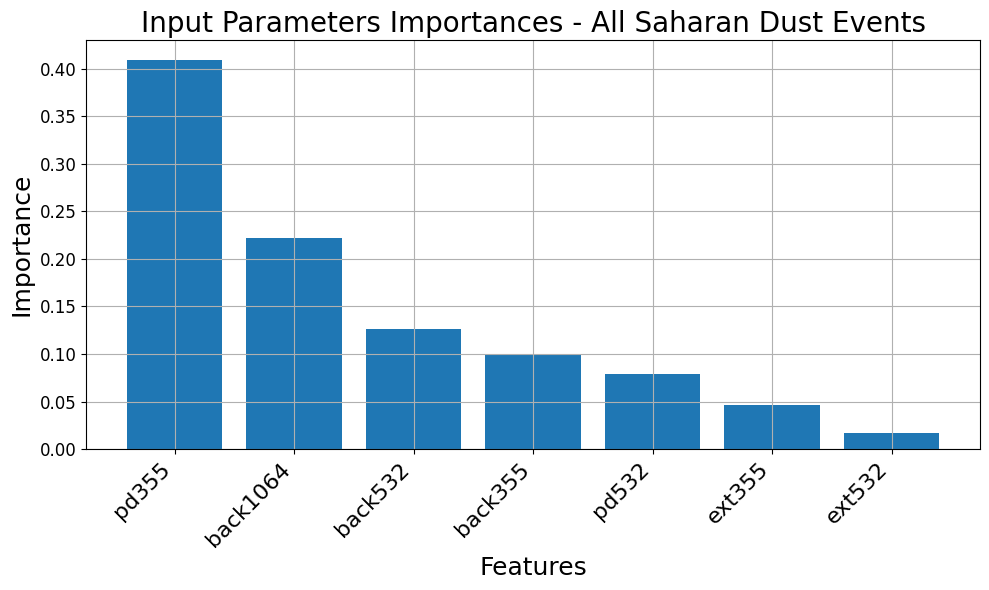

In [6]:
# D, D_importances = DecisionTree(X_prova,Y_prova)
D, D_importances = DecisionTree(X,Y)
num_samples = 312  # total number of cases 
case_labels = {i: f"Case{str(i+1).zfill(2)}" for i in range(num_samples)}
# print(case_labels)
variable_names = {
    0: "ext355",
    1: "ext532",
    2: "ext1064",
    3: "back355",
    4: "back532",
    5: "back1064",
    6: "pd355",
    7: "pd532",
    8: "pd1064"
}
# samples = list(range(len(Y_prova)))
samples = list(range(len(Y)))  
# print_tree(samples, D, case_labels, variable_names)

new_importances = {variable_names[key]: value for key, value in D_importances.items()}
sorted_importances = dict(sorted(new_importances.items(), key=lambda item: item[1], reverse=True))


plt.figure(figsize=(10, 6))  
plt.bar(sorted_importances.keys(), sorted_importances.values()) 
plt.xlabel('Features', fontsize=18)  
plt.ylabel('Importance', fontsize=18)  
plt.title('Input Parameters Importances - All Saharan Dust Events', fontsize=20)  
plt.xticks(rotation=45, ha='right', fontsize=16)  
plt.yticks(fontsize=12)  

plt.tight_layout()
plt.grid(True) 
plt.show()

In [ ]:
dot_graph = create_dot(D, case_labels, variable_names)
dot_graph.render('all_data_devscores1')

In [ ]:
D

In [ ]:
root_samples